In [1]:
#Data exploration and visualization of 911 Call Data from the City of Seattle 

In [2]:
#Getting and working with data
import pandas as pd
import numpy as np
import math
import re
import os
import datetime as dt
import string
import scipy as sp

#Visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster', rc={'font.size':30,
                              'axes.titlesize':30,
                              'axes.labelsize':25})
#sns.set_context("poster")
#sns.set_style("dark")
#sns.set_style("ticks")
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [227]:
#Path for Call_Data.csv
path_Call_Data = '/Users/LiaG/FIFI/Call_Data.csv'
path_Crime_Data = '/Users/LiaG/FIFI/crime_data.csv'
path_Demog_Data = '/Users/LiaG/FIFI/neighborhood_demogs_2018.xlsx'

In [4]:
#Load in Crime Data
crime_data = pd.read_csv(path_Crime_Data)
crime_data = pd.DataFrame(data = crime_data)

crime_data.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,20080000465209,12/13/08,2114.0,12/13/08,2114.0,DUI,DUI-LIQUOR,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
1,20100000202011,6/15/64,0.0,6/15/10,1031.0,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,WEST,Q,Q2,QUEEN ANNE
2,2012000023437,1/1/73,0.0,1/25/12,1048.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NORTH,N,N2,NORTHGATE
3,20130000327785,6/1/74,0.0,9/9/13,1117.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
4,20160000289384,1/1/75,0.0,8/11/16,1054.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN


In [104]:
#Loosely ID which beats correlate to which neigborhoods
beat_describe = crime_data['Beat'].describe()
print(beat_describe)

beat_neighb = crime_data.groupby(['Beat'])['Neighborhood'].value_counts(sort=True)
#beat_neighb = pd.DataFrame(data = beat_neighb)

count     520293
unique        64
top           K3
freq       16939
Name: Beat, dtype: object


In [105]:
beat_neighb
#beat_neighb.reset_index()
#beat_neighb.rename(columns = {'Neighborhood':'Call Count'}, inplace = True)

Beat  Neighborhood                    
B1    BALLARD SOUTH                       11139
B2    FREMONT                              7416
      BALLARD SOUTH                        4472
      PHINNEY RIDGE                        1899
B3    WALLINGFORD                          9898
      FREMONT                              2826
      PHINNEY RIDGE                         334
C1    CAPITOL HILL                         4425
      MONTLAKE/PORTAGE BAY                 1256
      MILLER PARK                          1165
      EASTLAKE - EAST                       860
      CENTRAL AREA/SQUIRE PARK              571
      UNKNOWN                                 3
C2    MONTLAKE/PORTAGE BAY                 2463
      MILLER PARK                          2268
      MADISON PARK                         1107
      CENTRAL AREA/SQUIRE PARK             1042
C3    CENTRAL AREA/SQUIRE PARK             5152
      MADRONA/LESCHI                       1604
      MADISON PARK                          682
C

In [109]:
#Read in csv file 
data = pd.read_csv(path_Call_Data)
data = pd.DataFrame(data = data)
data.reset_index(inplace=True, drop=True)

print('Original data shape:\n', data.shape, '\n')
print('Original data columns:\n', data.columns.values, '\n')

Original data shape:
 (4195926, 11) 

Original data columns:
 ['CAD Event Number' 'Event Clearance Description' 'Call Type' 'Priority'
 'Initial Call Type' 'Final Call Type' 'Original Time Queued'
 'Arrived Time' 'Precinct' 'Sector' 'Beat'] 



In [175]:
#Add Neighborhood Column
#data = data.drop(columns=['Neighborhood'])

In [182]:
#Add Neighborhood/Beat Associations to Call Data by neigborhood
# B1    BALLARD SOUTH                       11139
B1 = data.loc[data.Beat == 'B1']
B1["Neighborhood"] = 'BALLARD SOUTH'

# B2    FREMONT                              7416
B2 = data.loc[data.Beat == 'B2']
B2["Neighborhood"] = 'FREMONT'

# B3    FREMONT                              2826
B3 = data.loc[data.Beat == 'B3']
B3["Neighborhood"] = 'FREMONT'

# C1    CAPITOL HILL                         4425
C1 = data.loc[data.Beat == 'C1']
C1["Neighborhood"] = 'CAPITOL HILL'

# C2    MONTLAKE/PORTAGE BAY                 2463
C2 = data.loc[data.Beat == 'C2']
C2["Neighborhood"] = 'MONTLAKE/PORTAGE BAY'

# C3    CENTRAL AREA/SQUIRE PARK             5152
C3 = data.loc[data.Beat == 'C3']
C3["Neighborhood"] = 'CENTRAL AREA/SQUIRE PARK'

# D1    BELLTOWN                            11280
D1 = data.loc[data.Beat == 'D1']
D1["Neighborhood"] = 'BELLTOWN'

# D2    SLU/CASCADE                          7296
D2 = data.loc[data.Beat == 'D2']
D2["Neighborhood"] = 'SLU/CASCADE'

# D3    SLU/CASCADE                          6683
D3 = data.loc[data.Beat == 'D3']
D3["Neighborhood"] = 'SLU/CASCADE'

# E1    CAPITOL HILL                        10276
E1 = data.loc[data.Beat == 'E1']
E1["Neighborhood"] = 'CAPITOL HILL'

# E2    CAPITOL HILL                        12619
E2 = data.loc[data.Beat == 'E2']
E2["Neighborhood"] = 'CAPITOL HILL'

# E3    FIRST HILL                           7164
E3 = data.loc[data.Beat == 'E3']
E3["Neighborhood"] = 'FIRST HILL'

# F1    HIGH POINT                           2708
F1 = data.loc[data.Beat == 'F1']
F1["Neighborhood"] = 'HIGH POINT'

# F2    ROXHILL/WESTWOOD/ARBOR HEIGHTS       6255
F2 = data.loc[data.Beat == 'F2']
F2["Neighborhood"] = 'ROXHILL/WESTWOOD/ARBOR HEIGHTS'

# F3    HIGHLAND PARK                        3831
F3 = data.loc[data.Beat == 'F3']
F3["Neighborhood"] = 'HIGHLAND PARK'

# G1    FIRST HILL                           4900
G1 = data.loc[data.Beat == 'G1']
G1["Neighborhood"] = 'FIRST HILL'

# G2    CENTRAL AREA/SQUIRE PARK             5452
G2 = data.loc[data.Beat == 'G2']
G2["Neighborhood"] = 'CENTRAL AREA/SQUIRE PARK'

# G3    MADRONA/LESCHI                       3720
G3 = data.loc[data.Beat == 'G3']
G3["Neighborhood"] = 'MADRONA/LESCHI'

# J1    GREENWOOD                            5226
J1 = data.loc[data.Beat == 'J1']
J1["Neighborhood"] = 'GREENWOOD'

# J2    BALLARD NORTH                        6886
J2 = data.loc[data.Beat == 'J2']
J2["Neighborhood"] = 'BALLARD NORTH'

# J3    ROOSEVELT/RAVENNA                    7722
J3 = data.loc[data.Beat == 'J3']
J3["Neighborhood"] = 'ROOSEVELT/RAVENNA'

# K1    DOWNTOWN COMMERCIAL                 10380
K1 = data.loc[data.Beat == 'K1']
K1["Neighborhood"] = 'DOWNTOWN COMMERCIAL'

# K2    PIONEER SQUARE                       7235
K2 = data.loc[data.Beat == 'K2']
K2["Neighborhood"] = 'PIONEER SQUARE'

# K3    CHINATOWN/INTERNATIONAL DISTRICT    14471
K3 = data.loc[data.Beat == 'K3']
K3["Neighborhood"] = 'CHINATOWN/INTERNATIONAL DISTRICT'

# L1    LAKECITY                             5781
L1 = data.loc[data.Beat == 'L1']
L1["Neighborhood"] = 'LAKECITY'

# L2    NORTHGATE                           12930
L2 = data.loc[data.Beat == 'L2']
L2["Neighborhood"] = 'NORTHGATE'

# L3    LAKECITY                             7226
L3 = data.loc[data.Beat == 'L3']
L3["Neighborhood"] = 'LAKECITY'

# M1    DOWNTOWN COMMERCIAL                 10457
M1 = data.loc[data.Beat == 'M1']
M1["Neighborhood"] = 'DOWNTOWN COMMERCIAL'

# M2    DOWNTOWN COMMERCIAL                 10480
M2 = data.loc[data.Beat == 'M2']
M2["Neighborhood"] = 'DOWNTOWN COMMERCIAL'

# M3    DOWNTOWN COMMERCIAL                 14190
M3 = data.loc[data.Beat == 'M3']
M3["Neighborhood"] = 'DOWNTOWN COMMERCIAL'

# N     UNKNOWN                                 3
N = data.loc[data.Beat == 'N']
N["Neighborhood"] = 'UNKNOWN'

# N1    BITTERLAKE                           6395
N1 = data.loc[data.Beat == 'N1']
N1["Neighborhood"] = 'BITTERLAKE'

# N2    NORTHGATE                            7734
N2 = data.loc[data.Beat == 'N2']
N2["Neighborhood"] = 'NORTHGATE'

# N3    NORTHGATE                            7356
N3 = data.loc[data.Beat == 'N3']
N3["Neighborhood"] = 'NORTHGATE'

# O1    SODO                                 6784
O1 = data.loc[data.Beat == 'O1']
O1["Neighborhood"] = 'SODO'

# O2    SODO                                 2104
O2 = data.loc[data.Beat == 'O2']
O2["Neighborhood"] = 'SODO'

# O3    GEORGETOWN                           3949
O3 = data.loc[data.Beat == 'O3']
O3["Neighborhood"] = 'GEORGETOWN'

# Q1    MAGNOLIA                             7875
Q1 = data.loc[data.Beat == 'Q1']
Q1["Neighborhood"] = 'MAGNOLIA'

# Q2    QUEEN ANNE                          11876
Q2 = data.loc[data.Beat == 'Q2']
Q2["Neighborhood"] = 'QUEEN ANNE'

# Q3    QUEEN ANNE                          10665
Q3 = data.loc[data.Beat == 'Q3']
Q3["Neighborhood"] = 'QUEEN ANNE'

# R1    NORTH BEACON HILL                    7693
R1 = data.loc[data.Beat == 'R1']
R1["Neighborhood"] = 'NORTH BEACON HILL'

# R2    MOUNT BAKER                          7028
R2 = data.loc[data.Beat == 'R2']
R2["Neighborhood"] = 'MOUNT BAKER'

# R3    LAKEWOOD/SEWARD PARK                 3394
R3 = data.loc[data.Beat == 'R3']
R3["Neighborhood"] = 'LAKEWOOD/SEWARD PARK'

# S     UNKNOWN                                 9
S = data.loc[data.Beat == 'S']
S["Neighborhood"] = 'UNKNOWN'

# S1    NEW HOLLY                            3194
S1 = data.loc[data.Beat == 'S1']
S1["Neighborhood"] = 'NEW HOLLY'

# S2    BRIGHTON/DUNLAP                      7070
S2 = data.loc[data.Beat == 'S2']
S2["Neighborhood"] = 'BRIGHTON/DUNLAP'

# S3    RAINIER VIEW                         5492
S3 = data.loc[data.Beat == 'S3']
S3["Neighborhood"] = 'RAINIER VIEW'

# SS    UNKNOWN                                 2
SS = data.loc[data.Beat == 'SS']
SS["Neighborhood"] = 'UNKNOWN'

# U1    UNIVERSITY                           8098
U1 = data.loc[data.Beat == 'U1']
U1["Neighborhood"] = 'UNIVERSITY'

# U2    UNIVERSITY                          12616
U2 = data.loc[data.Beat == 'U2']
U2["Neighborhood"] = 'UNIVERSITY'

# U3    SANDPOINT                            8596
U3 = data.loc[data.Beat == 'U3']
U3["Neighborhood"] = 'SANDPOINT'

# W     UNKNOWN                                 6
W = data.loc[data.Beat == 'W']
W["Neighborhood"] = 'UNKNOWN'

# W1    NORTH ADMIRAL                        4657
W1 = data.loc[data.Beat == 'W1']
W1["Neighborhood"] = 'NORTH ADMIRAL'

# W2    ALASKA JUNCTION                      6964
W2 = data.loc[data.Beat == 'W2']
W2["Neighborhood"] = 'ALASKA JUNCTION'

# W3    MORGAN                               3373
W3 = data.loc[data.Beat == 'W3']
W3["Neighborhood"] = 'MORGAN'

# WS    UNKNOWN                                 1
WS = data.loc[data.Beat == 'WS']
WS["Neighborhood"] = 'UNKNOWN'

# X9    UNKNOWN                                 3
X9 = data.loc[data.Beat == 'X9']
X9["Neighborhood"] = 'UNKNOWN'

In [194]:
#Create a new dataframe with the neighborhood associations added
df_neighb = pd.concat([B1, B2, B3, 
                         C1, C2, C3, 
                         D1, D2, D3, 
                         E1, E2, E3, 
                         F1, F2, F3, 
                         G1, G2, G3, 
                         J1, J2, J3, 
                         K1, K2, K3, 
                         L1, L2, L3, 
                         M1, M2, M3, 
                         N, N1, N2, N3, 
                         O1, O2, O3, 
                         Q1, Q2, Q3, 
                         R1, R2, R3, 
                         S, S1, S2, S3, SS, 
                         U1, U2, U3, 
                         W, W1, W2, W3, WS, 
                         X9], ignore_index=True)

In [195]:
df_neighb

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,Neighborhood
0,2009000189503,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",1,ACC - WITH INJURIES (INCLUDES HIT AND RUN),--TRAFFIC - MV COLLISION INVESTIGATION,06/02/2009 08:42:49 AM,Jun 2 2009 08:52:06:000AM,NORTH,BOY,B1,BALLARD SOUTH
1,2009000189666,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,AUTO THEFT - VEH THEFT OR THEFT & RECOVERY,--AUTOMOBILES - AUTO THEFT,06/02/2009 11:34:32 AM,Jun 2 2009 12:27:05:000PM,NORTH,BOY,B1,BALLARD SOUTH
2,2009000189694,REPORT WRITTEN (NO ARREST),911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),"--ASSAULTS, OTHER",06/02/2009 11:57:42 AM,Jun 2 2009 12:03:39:000PM,NORTH,BOY,B1,BALLARD SOUTH
3,2009000189715,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",2,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,06/02/2009 12:20:51 PM,Jun 2 2009 02:08:18:000PM,NORTH,BOY,B1,BALLARD SOUTH
4,2009000189752,PROBLEM SOLVING PROJECT,ONVIEW,7,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--INTOX & LIQ VIOLS - ADULTS (VIOLATIONS),06/02/2009 12:49:13 PM,Jun 2 2009 12:49:13:000PM,NORTH,BOY,B1,BALLARD SOUTH
...,...,...,...,...,...,...,...,...,...,...,...,...
4173658,2019000436436,ASSISTANCE RENDERED,ONVIEW,3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,11/23/2019 05:15:29 PM,Nov 23 2019 05:15:29:000PM,UNKNOWN,NaN,WS,UNKNOWN
4173659,2019000450156,ASSISTANCE RENDERED,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",--PREMISE CHECKS - BUSINESS CHECK,12/05/2019 11:17:44 AM,Dec 5 2019 11:17:44:000AM,UNKNOWN,NaN,WS,UNKNOWN
4173660,2019000463538,ASSISTANCE RENDERED,ONVIEW,7,DIRECTED PATROL ACTIVITY,--DIRECTED PATROL ACTIVITY,12/15/2019 12:57:59 PM,Dec 15 2019 12:57:59:000PM,UNKNOWN,NaN,WS,UNKNOWN
4173661,2019000463591,ASSISTANCE RENDERED,ONVIEW,7,TRAFFIC STOP - OFFICER INITIATED ONVIEW,--TRAFFIC - MOVING VIOLATION,12/15/2019 01:46:20 PM,Dec 15 2019 01:46:20:000PM,UNKNOWN,NaN,WS,UNKNOWN


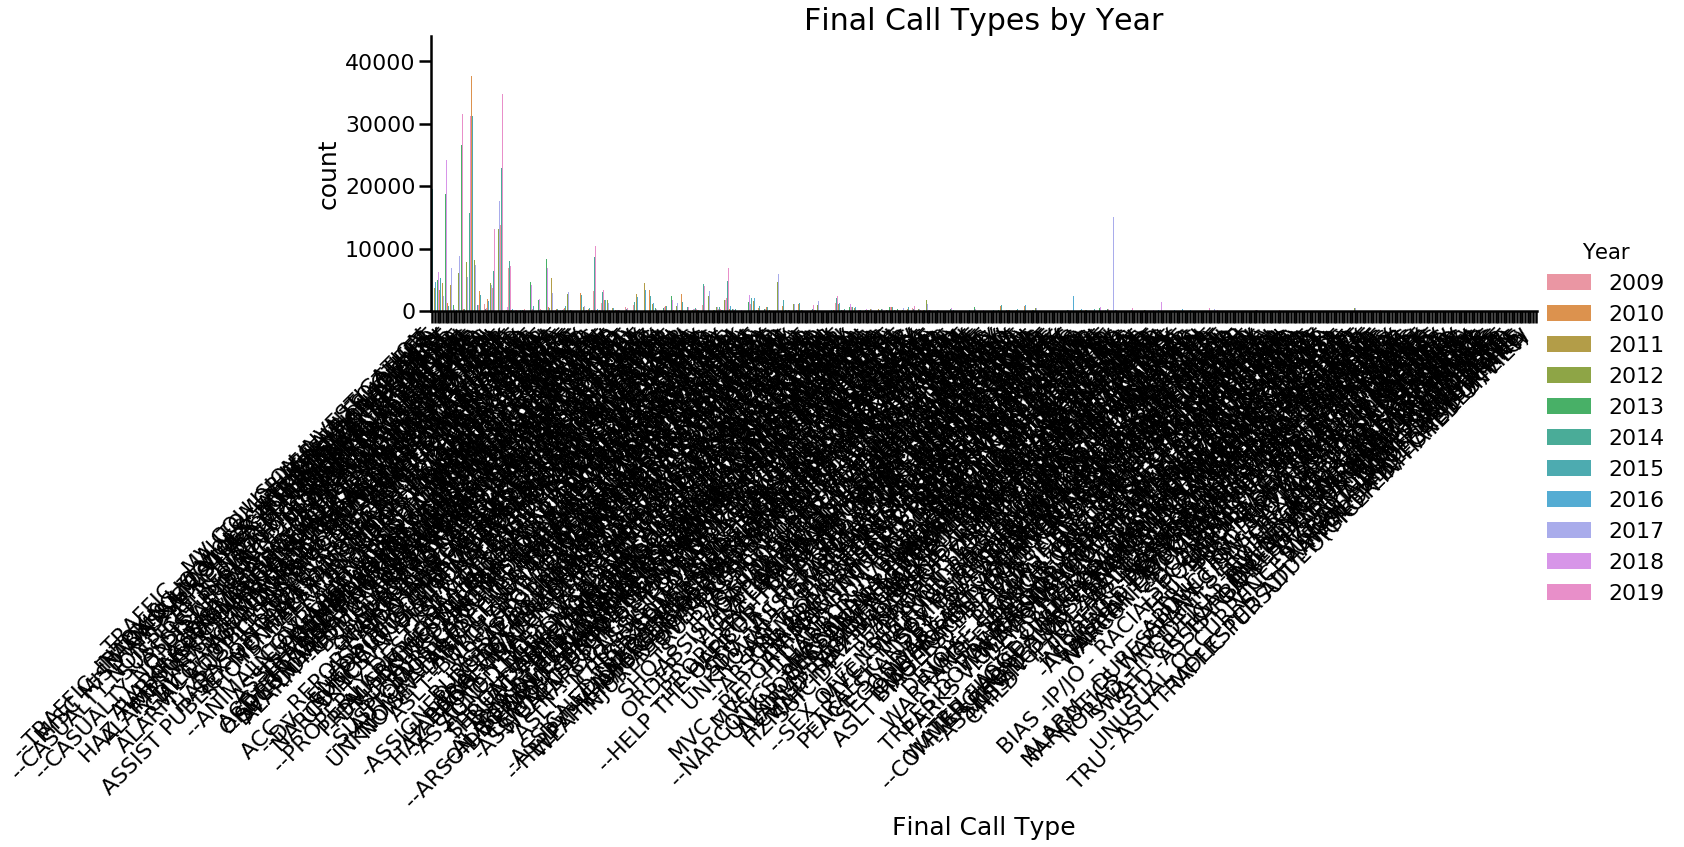

In [198]:
#How does Final Call Type change across year and category?
g = sns.catplot(x='Final Call Type', data=df_neighb, hue='Year', kind='count', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Final Call Types by Year', y=1.25)
plt.subplots_adjust(hspace = 1.5)

In [196]:
#Describe 'Final Call Type' column
final_call_type = df_neighb['Final Call Type'].value_counts()
print(final_call_type, end="\n\n")
print(df_neighb['Final Call Type'].describe())

--PREMISE CHECKS - CRIME PREVENTION                   370291
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON              343156
--DISTURBANCE - OTHER                                 299186
--TRAFFIC - MOVING VIOLATION                          244347
--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR)       217733
--TRAFFIC - MV COLLISION INVESTIGATION                186213
--ASSIST PUBLIC - OTHER (NON-SPECIFIED)               155887
--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE             101560
--PROWLER - TRESPASS                                   97674
--CRISIS COMPLAINT - GENERAL                           92833
--DIRECTED PATROL ACTIVITY                             92548
-OFF DUTY EMPLOYMENT                                   87650
--THEFT - CAR PROWL                                    87250
--MISCHIEF OR NUISANCE - GENERAL                       81378
--THEFT - ALL OTHER                                    80230
--DISTURBANCE - NOISE                                  72508
--ASSIST OTHER AGENCY - 

count                                 4173663
unique                                    416
top       --PREMISE CHECKS - CRIME PREVENTION
freq                                   370291
Name: Final Call Type, dtype: object


In [197]:
#Convert string object to Timestamp object for dataset
df_neighb['Original Time Queued'] = df_neighb['Original Time Queued'].apply(lambda x : pd.to_datetime(str(x)))

df_neighb['Original Time Queued']
df_neighb['Year'] = pd.DatetimeIndex(df_neighb['Original Time Queued']).year
df_neighb['Month'] = pd.DatetimeIndex(df_neighb['Original Time Queued']).month
df_neighb['Day of Week'] = pd.DatetimeIndex(df_neighb['Original Time Queued']).weekday
df_neighb['Hour'] = pd.DatetimeIndex(df_neighb['Original Time Queued']).hour

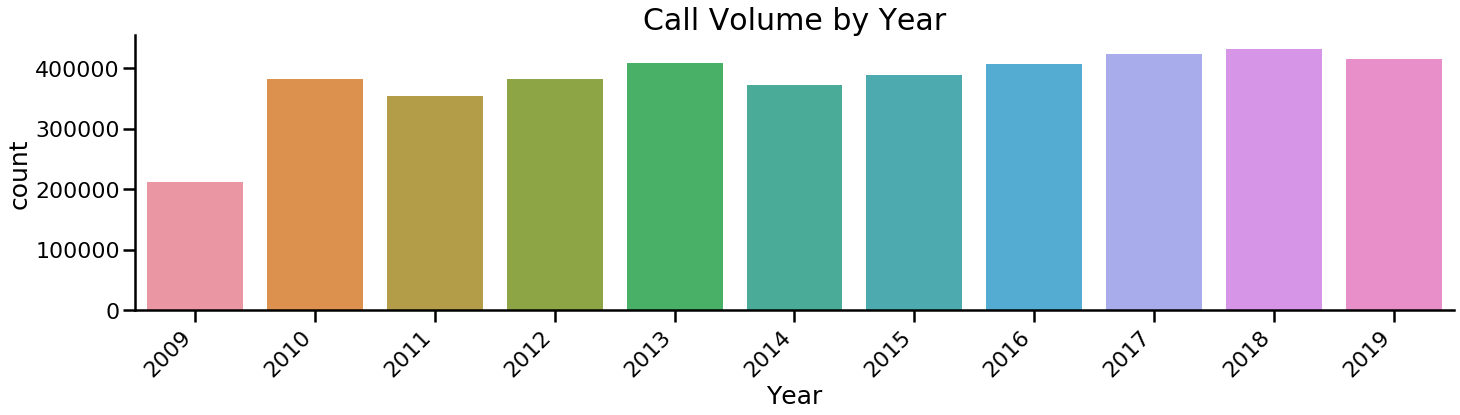

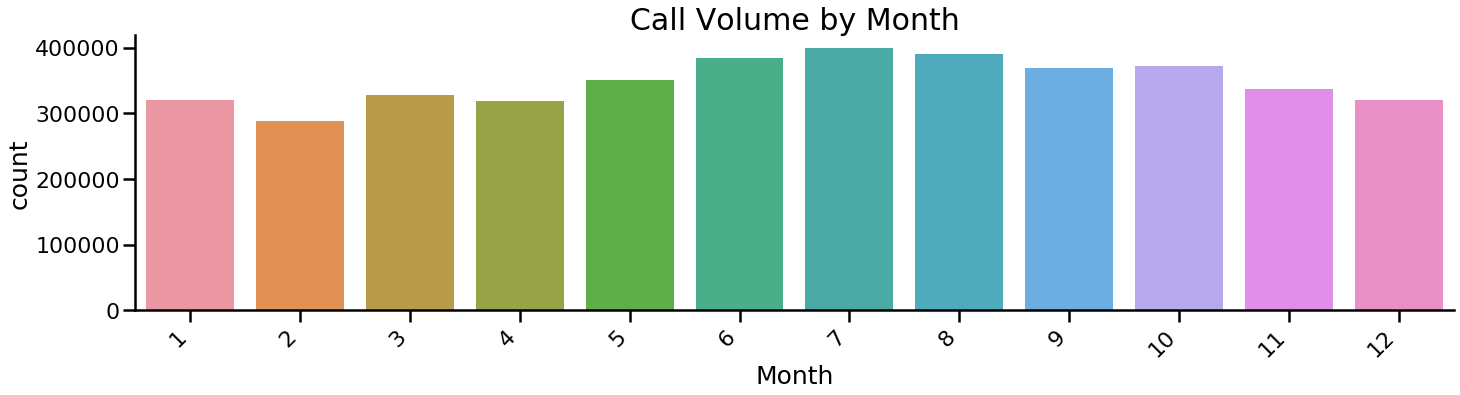

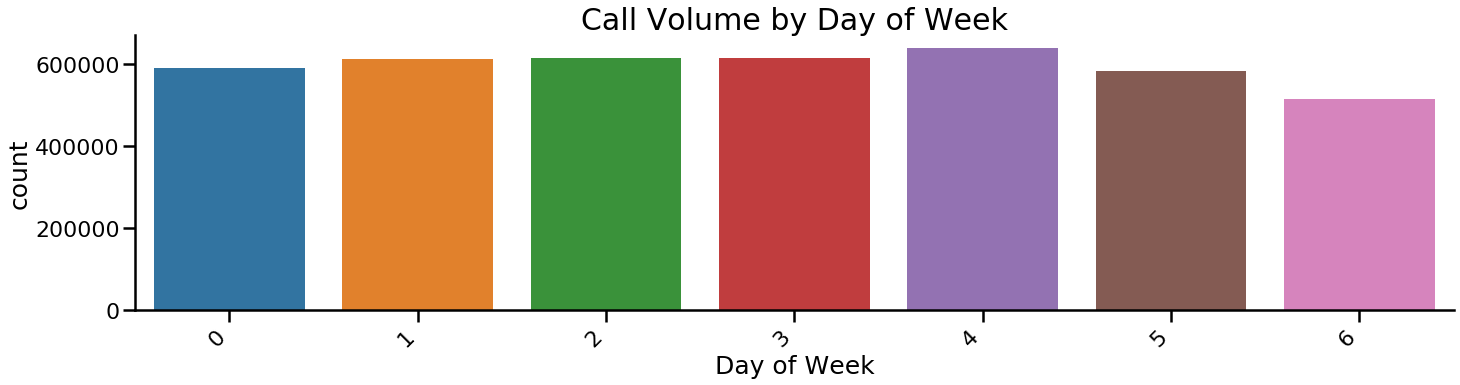

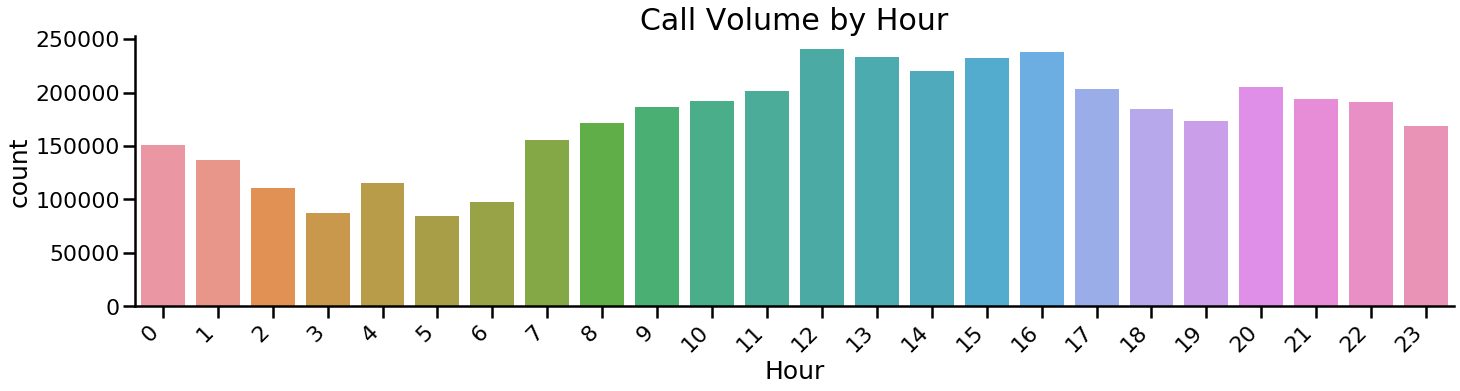

In [203]:
#Visualization of Call Volume by Year
g = sns.catplot(x='Year', data=df_neighb, kind='count', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Volume by Year', y=1.25)
plt.subplots_adjust(hspace = 1.5)

#Visualization of Call Volume by Month
g = sns.catplot(x='Month', data=df_neighb, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Volume by Month', y=1.25)
plt.subplots_adjust(hspace = 1.5)

#Visualization of Call Volume by Day of the Week
g = sns.catplot(x='Day of Week', data=df_neighb, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Volume by Day of Week', y=1.25)
plt.subplots_adjust(hspace = 1.5)

#Visualization of Call Volume by Hour
g = sns.catplot(x='Hour', data=df_neighb, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Volume by Hour', y=1.25)
plt.subplots_adjust(hspace = 1.5)

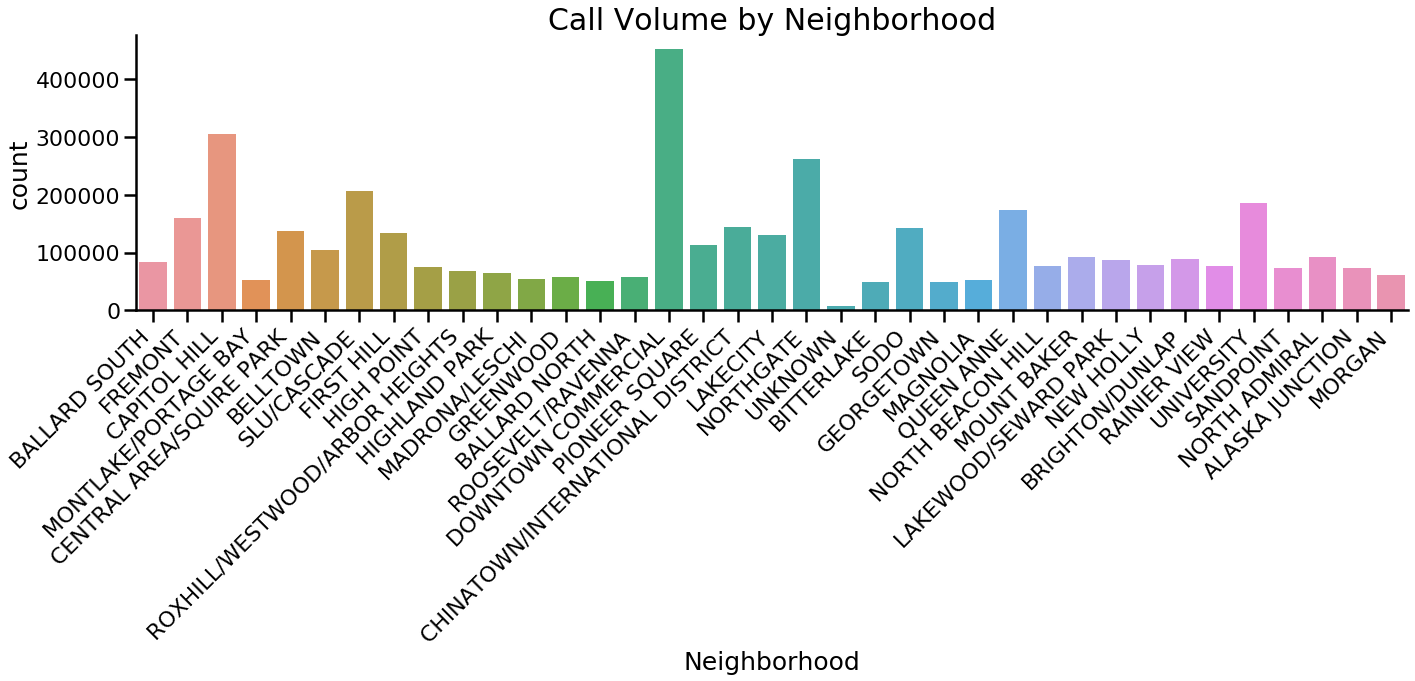

In [204]:
#Visualization of Call Volume by Neighborhood
g = sns.catplot(x='Neighborhood', data=df_neighb, kind='count', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Volume by Neighborhood', y=1.25)
plt.subplots_adjust(hspace = 1.5)

In [209]:
#Describe 'Neighborhood' column
beat = df_neighb['Neighborhood'].value_counts()
print(beat, end="\n\n")
print(df_neighb['Neighborhood'].describe())

DOWNTOWN COMMERCIAL                 453041
CAPITOL HILL                        304644
NORTHGATE                           261307
SLU/CASCADE                         205906
UNIVERSITY                          185815
QUEEN ANNE                          174206
FREMONT                             159356
CHINATOWN/INTERNATIONAL DISTRICT    143386
SODO                                142013
CENTRAL AREA/SQUIRE PARK            136564
FIRST HILL                          134091
LAKECITY                            129891
PIONEER SQUARE                      113176
BELLTOWN                            104646
MOUNT BAKER                          92883
NORTH ADMIRAL                        92619
BRIGHTON/DUNLAP                      88536
LAKEWOOD/SEWARD PARK                 86603
BALLARD SOUTH                        83177
NEW HOLLY                            78525
RAINIER VIEW                         76986
NORTH BEACON HILL                    76748
HIGH POINT                           74972
ALASKA JUNC

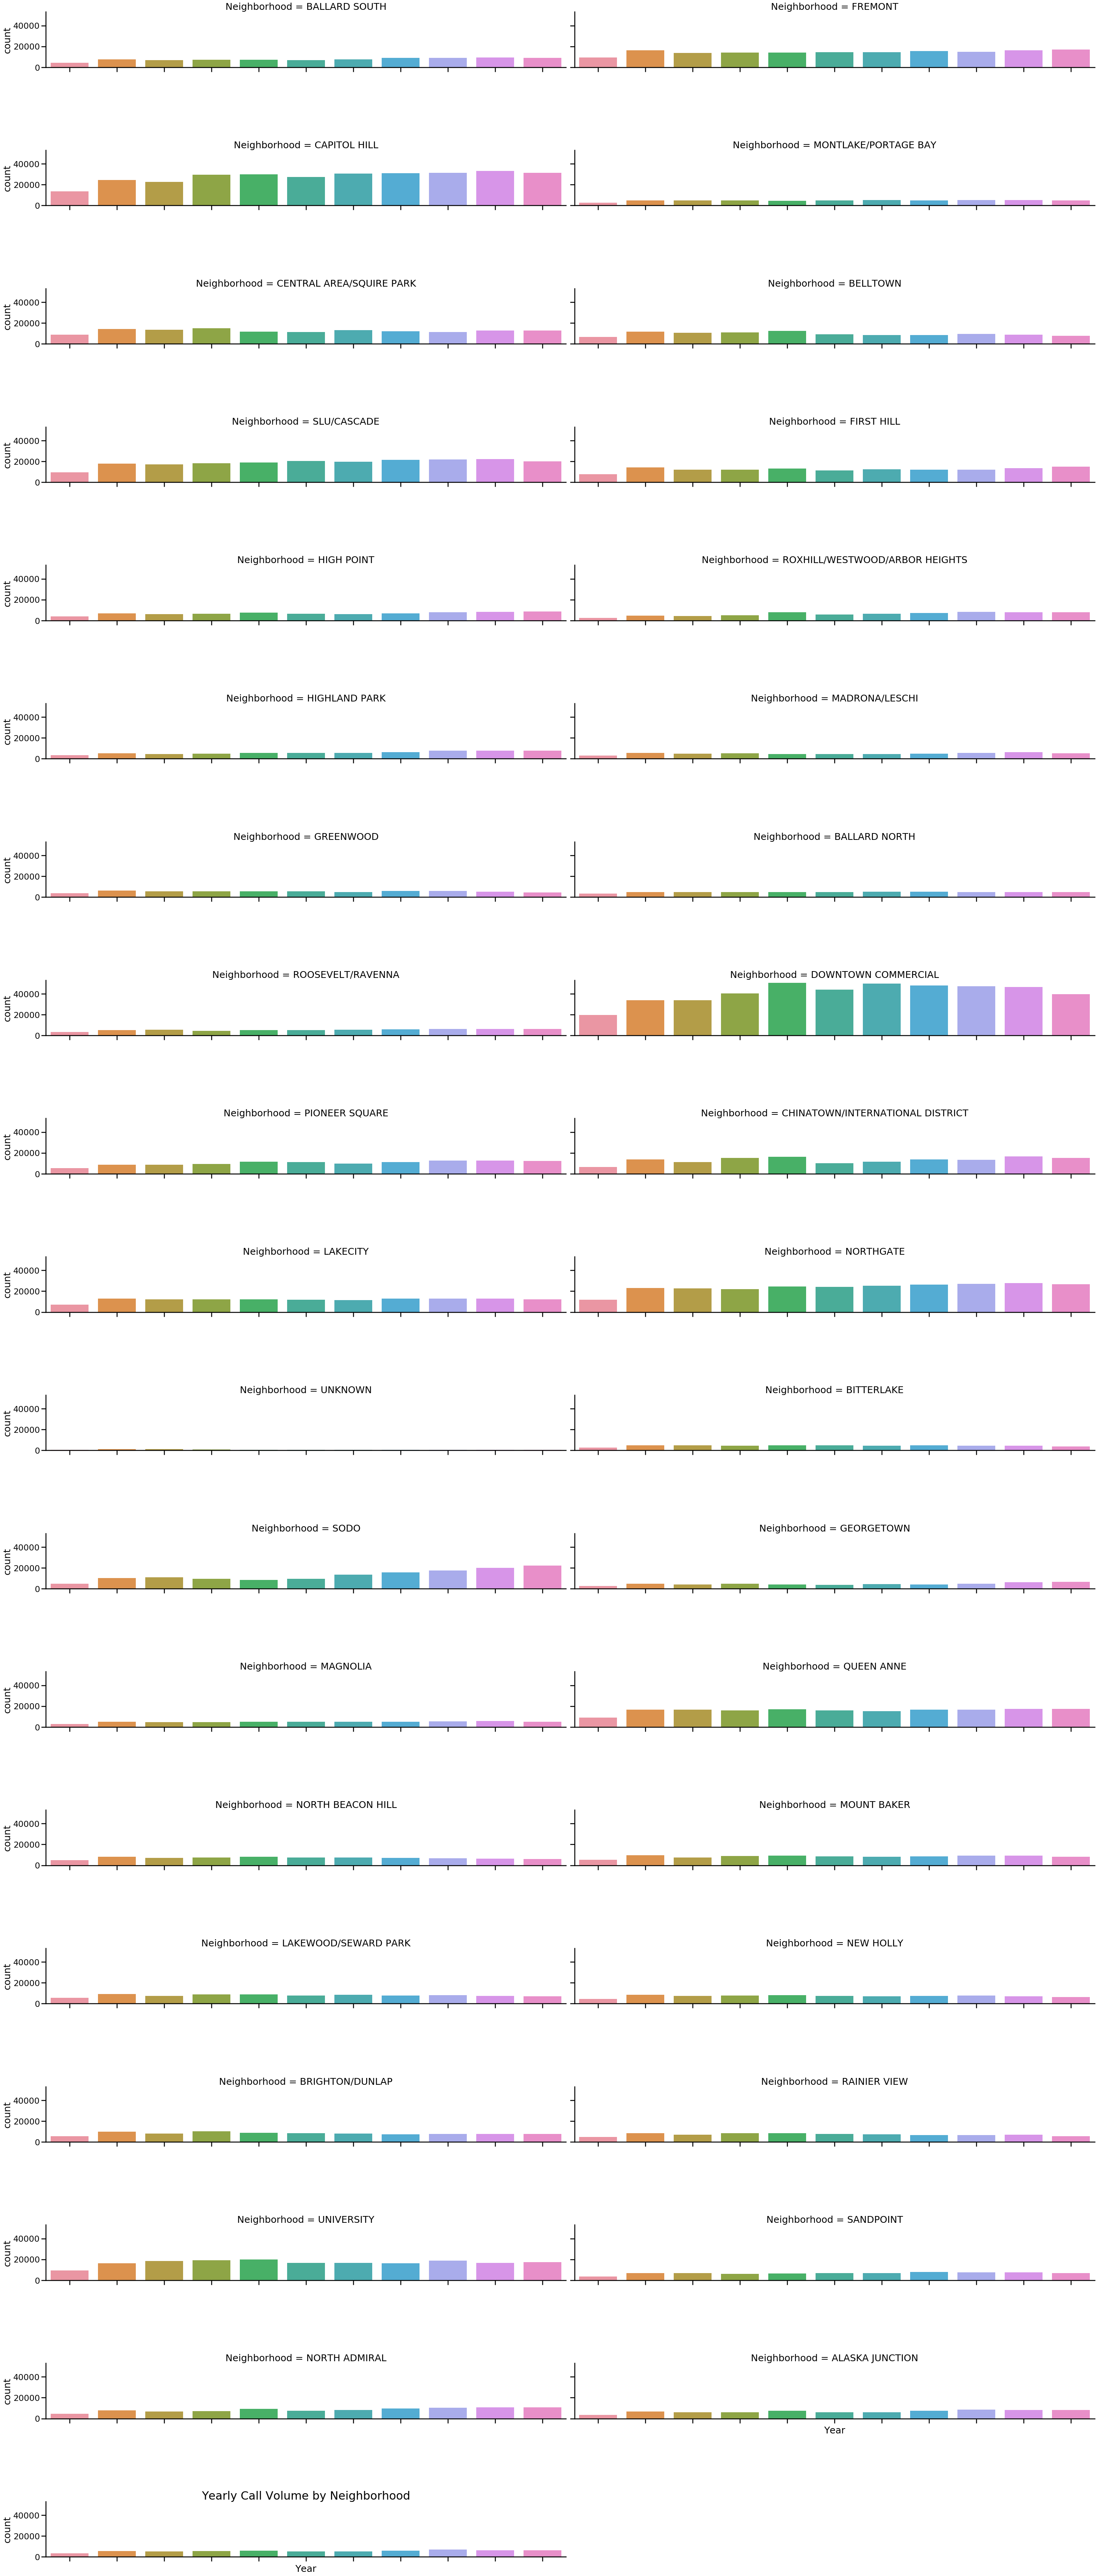

In [214]:
#Yearly call volume in each Neighborhood
g = sns.catplot(x='Year', data=df_neighb, col='Neighborhood', col_wrap=2, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Yearly Call Volume by Neighborhood', y=1.25)
plt.subplots_adjust(hspace = 1.5)

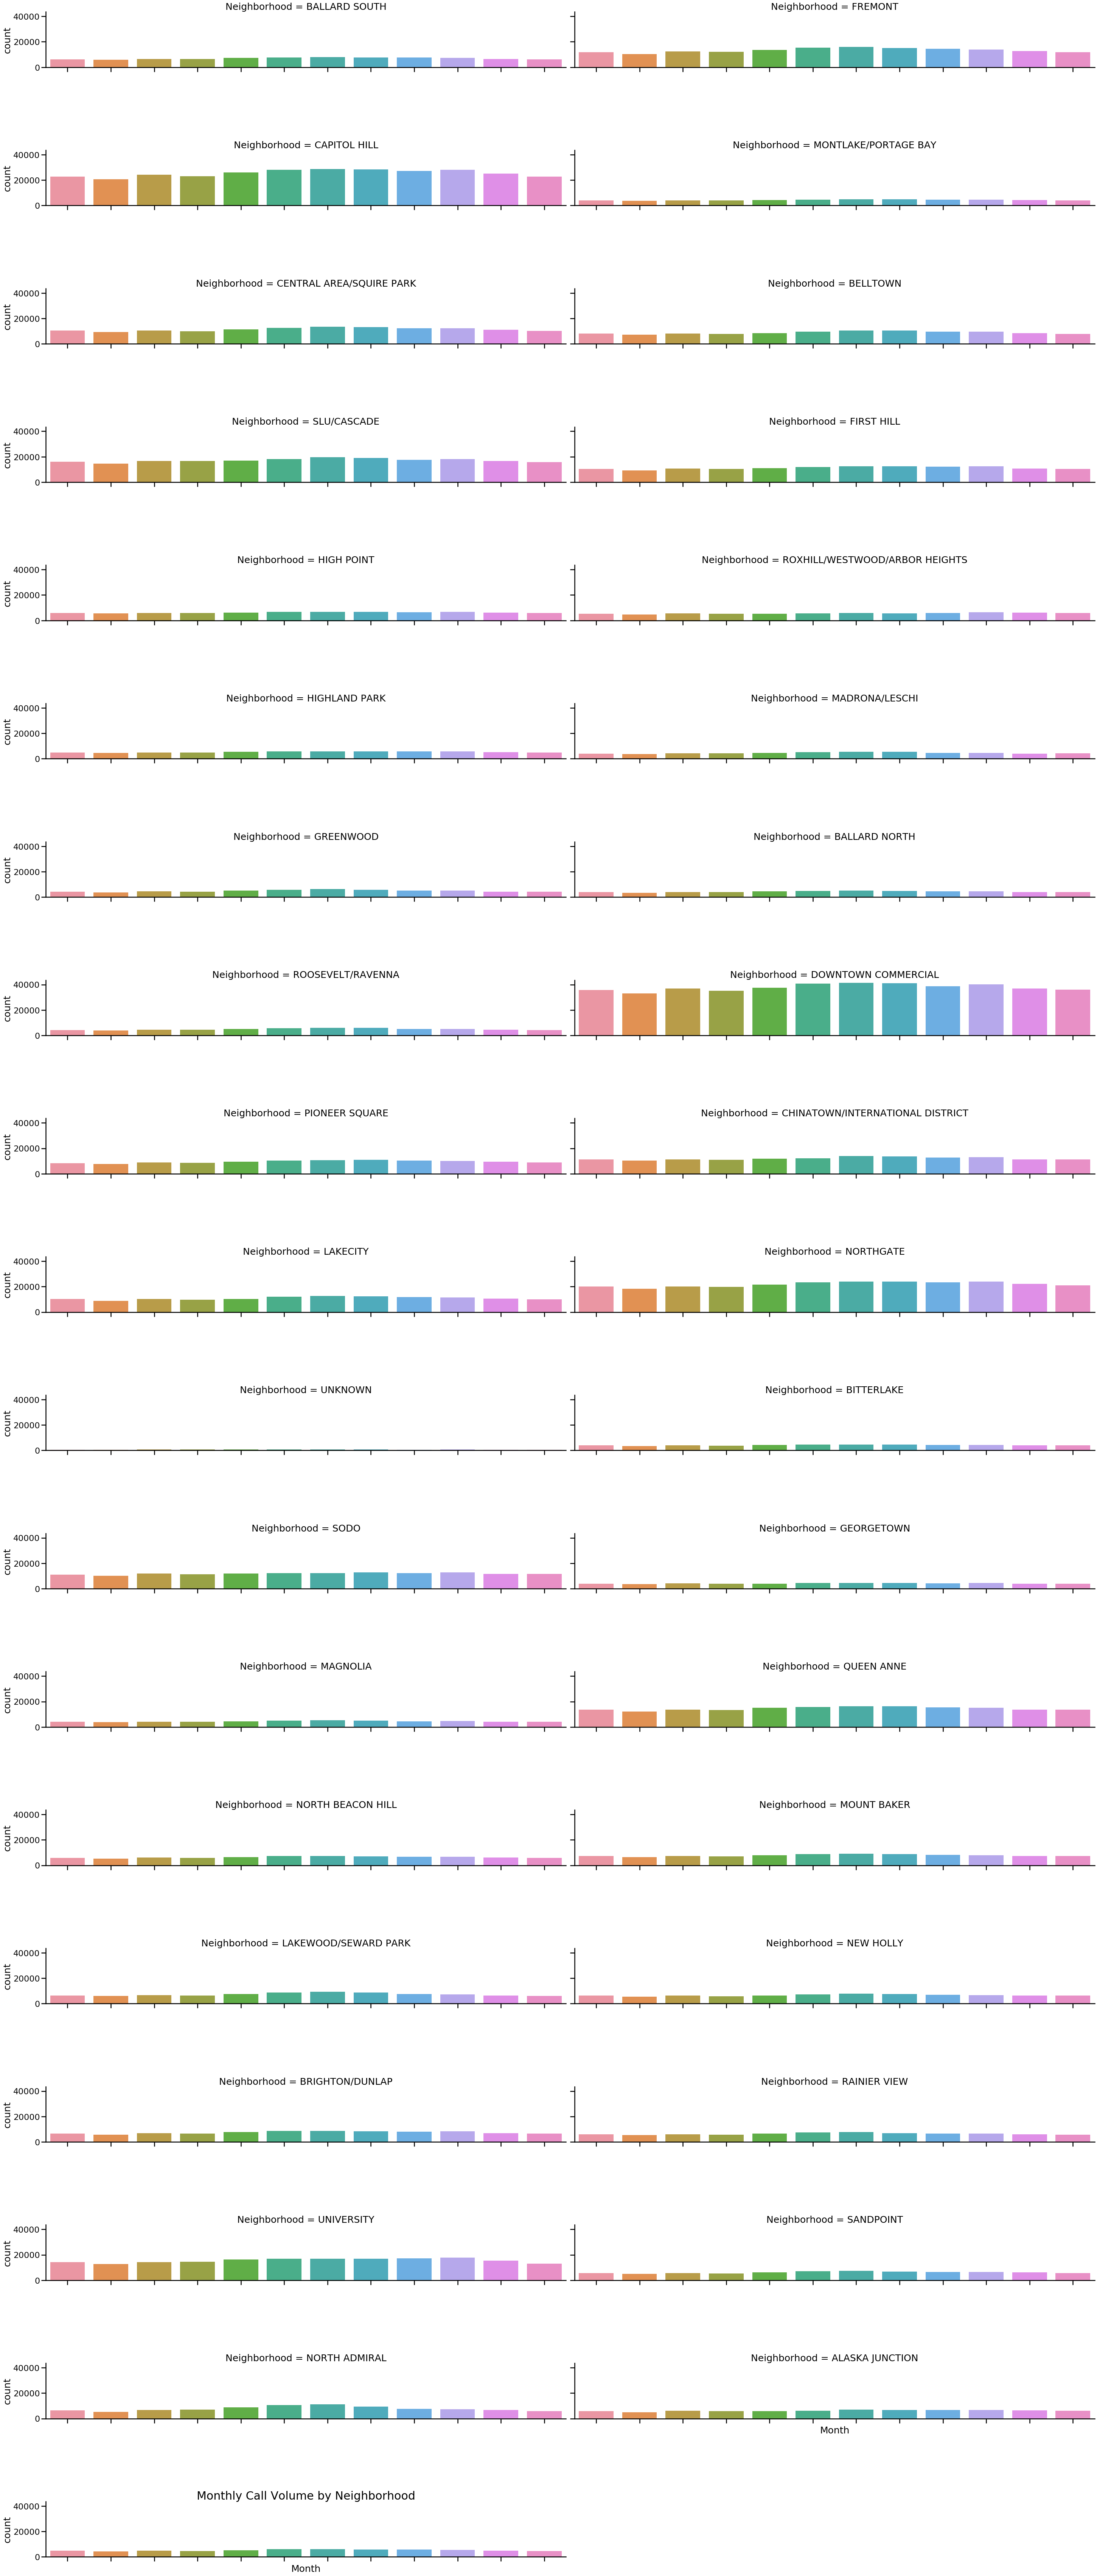

In [215]:
#Monthly call volume in each Neighborhood
g = sns.catplot(x='Month', data=df_neighb, col='Neighborhood', col_wrap=2, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Monthly Call Volume by Neighborhood', y=1.25)
plt.subplots_adjust(hspace = 1.5)

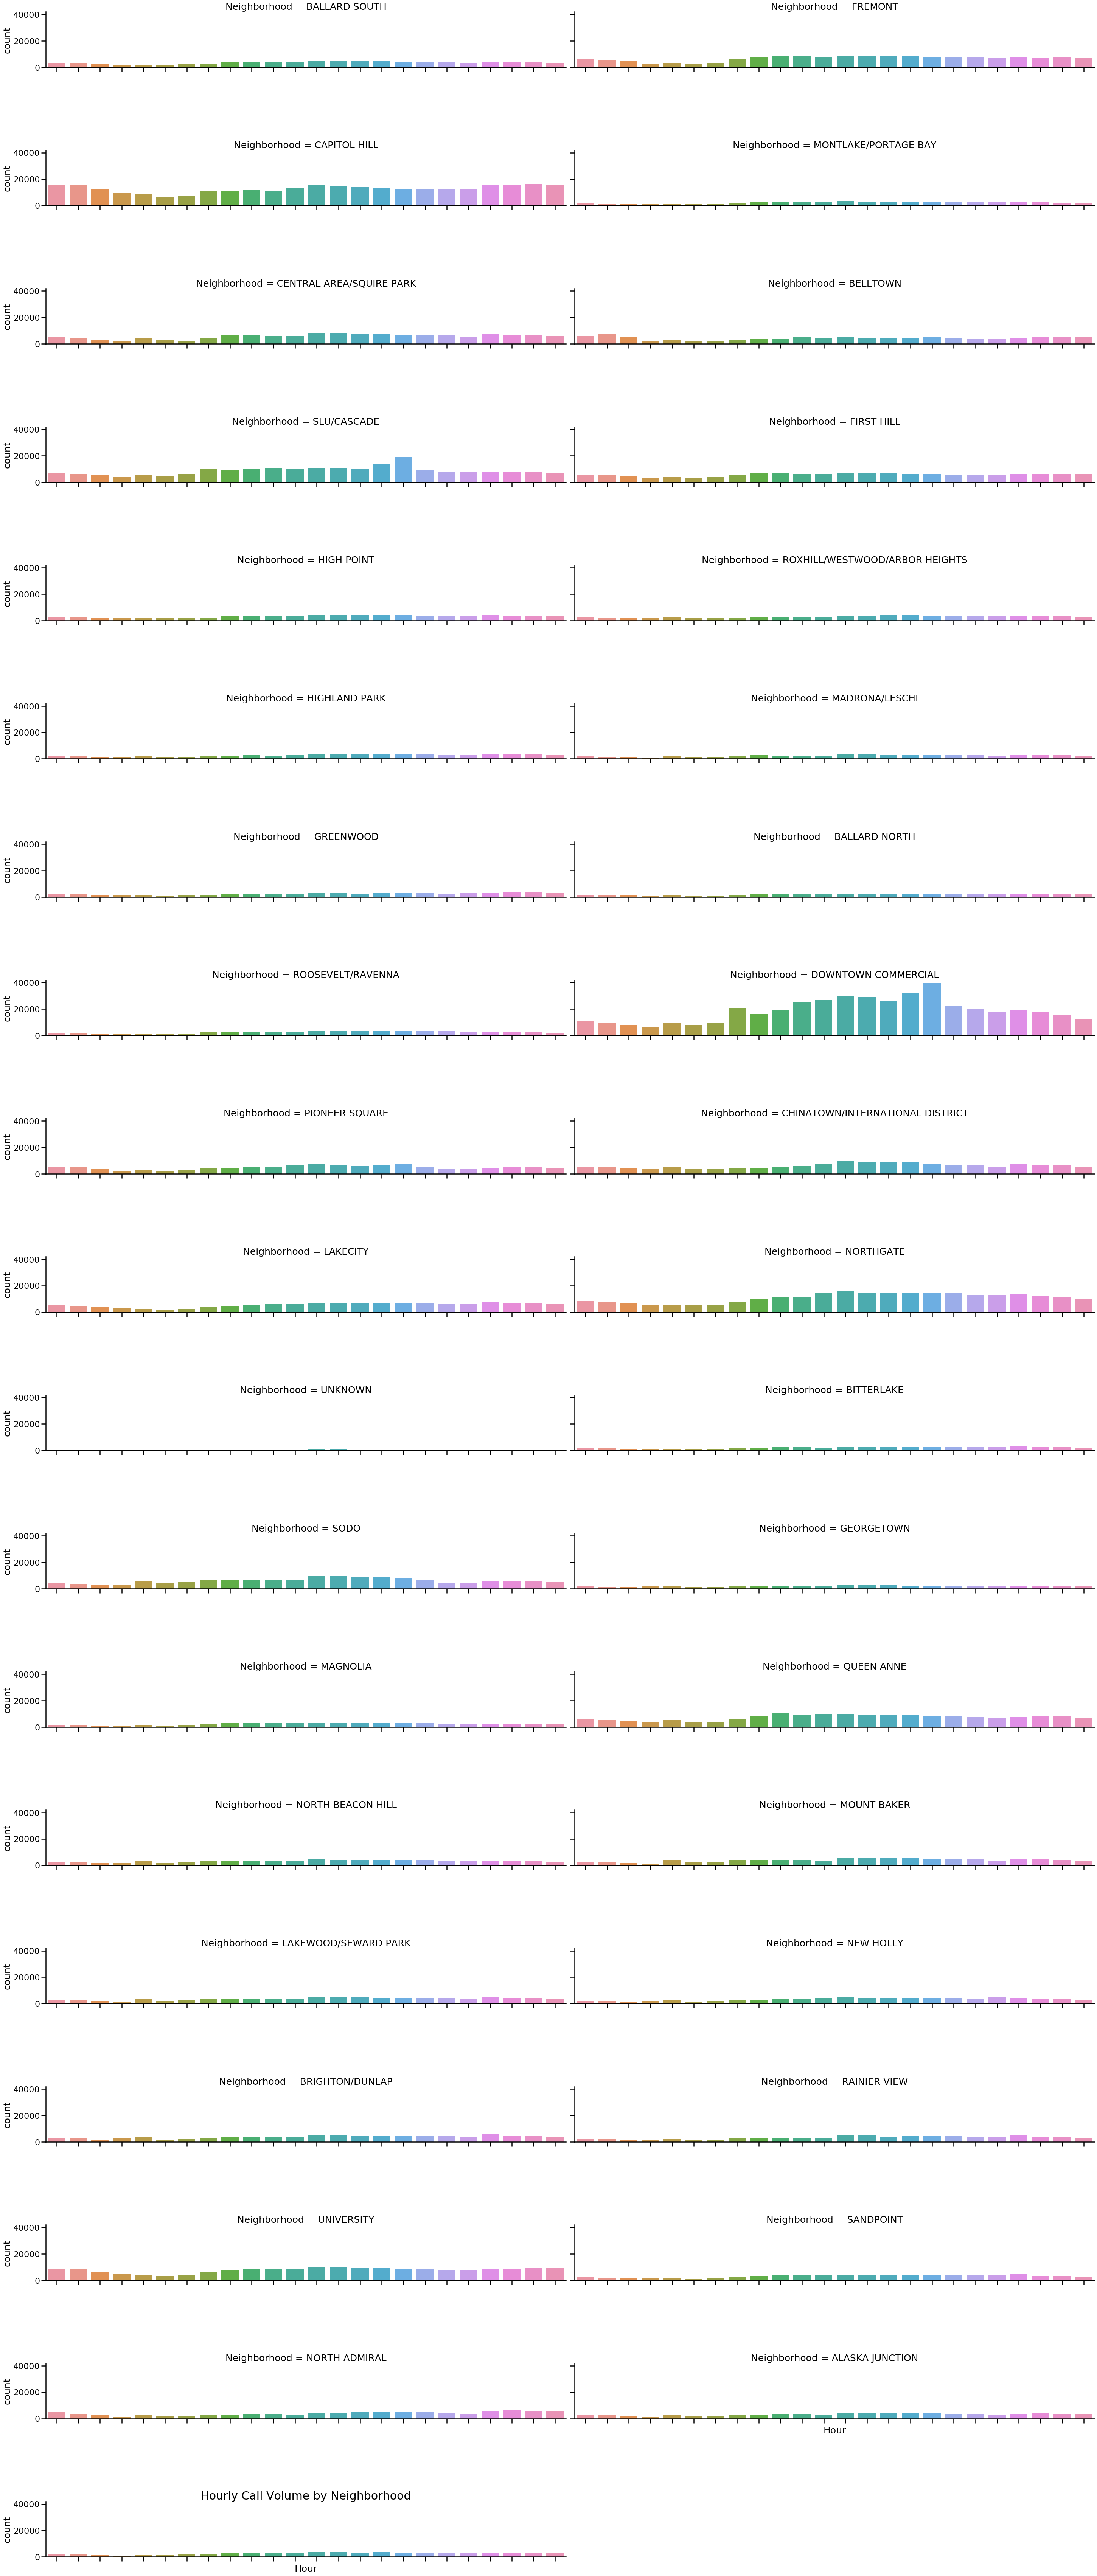

In [216]:
#Hourly call volume in each Neighborhood
g = sns.catplot(x='Hour', data=df_neighb, col='Neighborhood', col_wrap=2, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Hourly Call Volume by Neighborhood', y=1.25)
plt.subplots_adjust(hspace = 1.5)

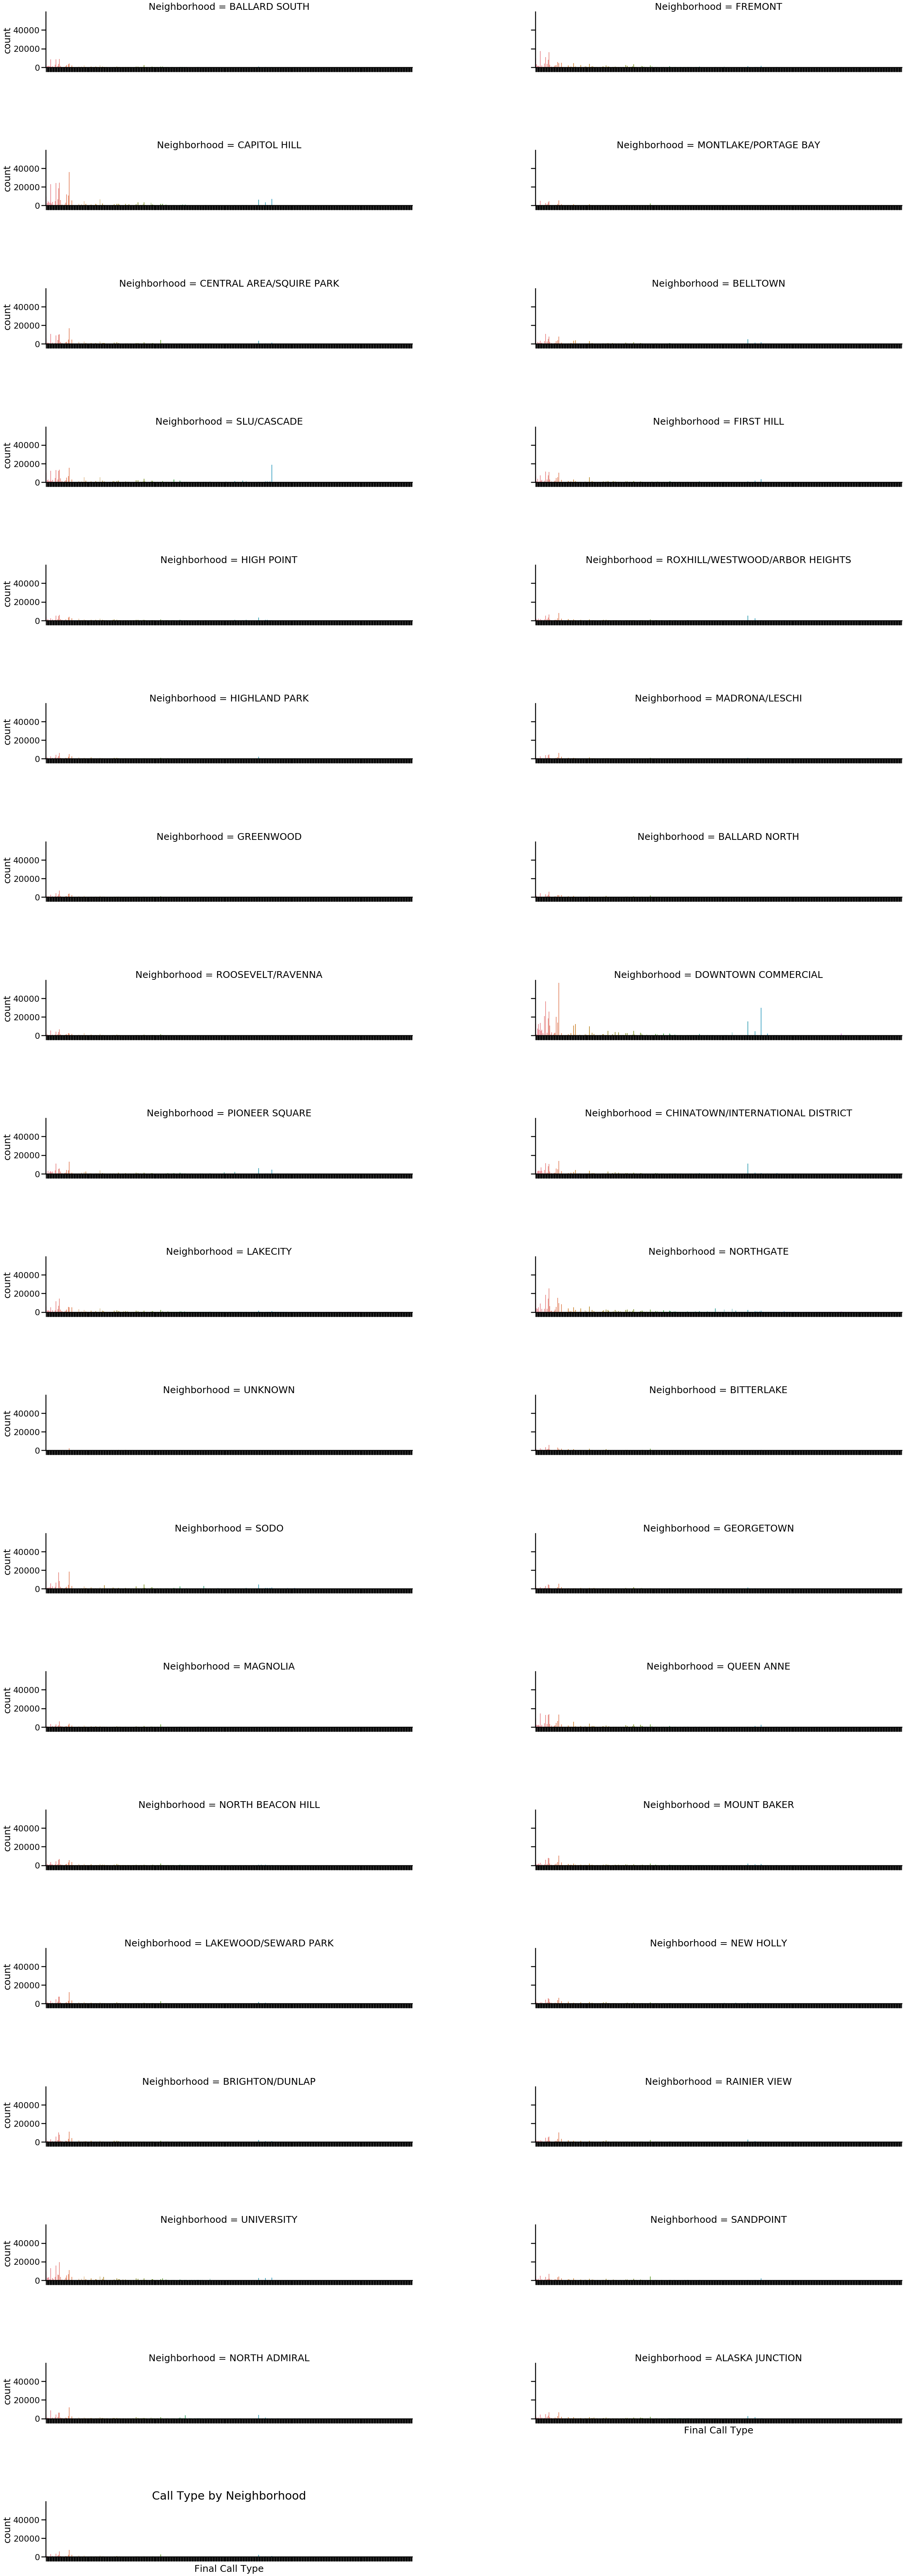

In [213]:
#How do counts change across neighborhood and Call Type?
g = sns.catplot(x='Final Call Type', data=df_neighb, col='Neighborhood', col_wrap=2, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Type by Neighborhood', y=1.25)
plt.subplots_adjust(hspace = 1.5)

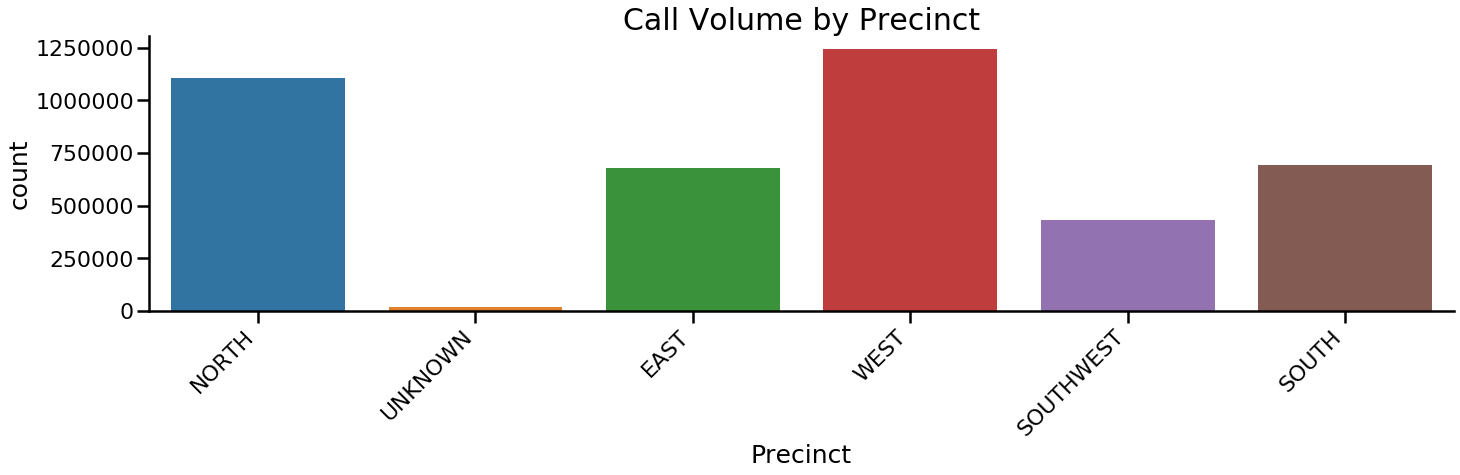

In [210]:
#Visualization of Call Volume by Precinct
g = sns.catplot(x='Precinct', data=df_neighb, kind='count', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Volume by Precinct', y=1.25)
plt.subplots_adjust(hspace = 1.5)

In [206]:
#Describe 'Precinct' column
precinct = df_neighb['Precinct'].value_counts()
print(precinct, end="\n\n")
print(df_neighb['Precinct'].describe())

WEST         1245885
NORTH        1106913
SOUTH         690923
EAST          679394
SOUTHWEST     432948
UNKNOWN        17600
Name: Precinct, dtype: int64

count     4173663
unique          6
top          WEST
freq      1245885
Name: Precinct, dtype: object


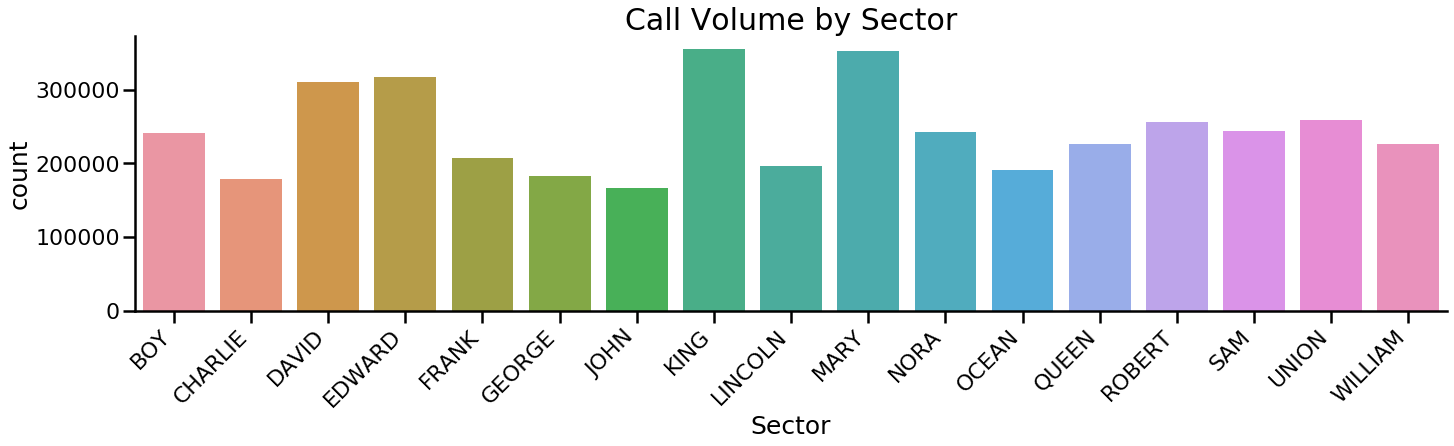

In [211]:
#Visualization of Call Volume by Sector
g = sns.catplot(x='Sector', data=df_neighb, kind='count', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Volume by Sector', y=1.25)
plt.subplots_adjust(hspace = 1.5)

In [207]:
#Describe 'Sector' column
sector = df_neighb['Sector'].value_counts()
print(sector, end="\n\n")
print(df_neighb['Sector'].describe())

KING       355535
MARY       353034
EDWARD     317691
DAVID      310406
UNION      258323
ROBERT     255904
SAM        243689
NORA       243141
BOY        242024
QUEEN      226910
WILLIAM    226083
FRANK      206865
LINCOLN    196398
OCEAN      191330
GEORGE     183345
CHARLIE    178358
JOHN       167027
Name: Sector, dtype: int64

count     4156063
unique         17
top          KING
freq       355535
Name: Sector, dtype: object


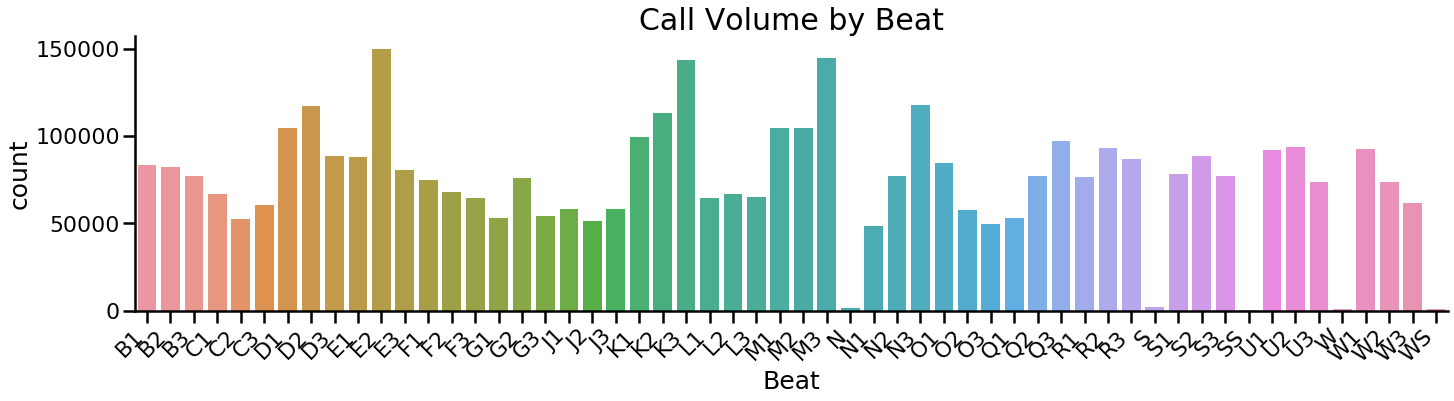

In [212]:
#Visualization of Call Volume by Beat
g = sns.catplot(x='Beat', data=df_neighb, kind='count', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Volume by Beat', y=1.25)
plt.subplots_adjust(hspace = 1.5)

In [208]:
#Describe 'Beat' column
beat = df_neighb['Beat'].value_counts()
print(beat, end="\n\n")
print(df_neighb['Beat'].describe())

E2    149721
M3    144348
K3    143386
N3    117492
D2    117316
K2    113176
M2    104776
D1    104646
M1    104377
K1     99540
Q3     97194
U2     93846
R2     92883
W1     92619
U1     91969
D3     88590
S2     88536
E1     87818
R3     86603
O1     84303
B1     83177
B2     82481
E3     80782
S1     78525
N2     77074
Q2     77012
S3     76986
B3     76875
R1     76748
G2     76151
F1     74972
W2     73770
U3     73480
F2     67761
C1     67105
L2     66741
L3     65061
L1     64830
F3     64455
W3     61776
C3     60413
J3     58244
J1     58201
O2     57710
G3     54404
Q1     53311
G1     53309
C2     52368
J2     51632
O3     49518
N1     48754
S       2388
N       1611
W       1131
WS      1034
SS       734
Name: Beat, dtype: int64

count     4173663
unique         56
top            E2
freq       149721
Name: Beat, dtype: object
